In [1]:
############# EDA ASSIGNMENT ########################################

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
############EDA--1 ---------------- Bike Details Dataset

In [7]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\BIKE DETAILS (1).csv")

In [9]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
1. What is the range of selling prices in the dataset?

In [11]:
#Answer-

price_range = df['selling_price'].max() - df['selling_price'].min()

print(f"Range of selling prices: {price_range} INR")

Range of selling prices: 755000 INR


In [ ]:
2. What is the median selling price for bikes in the dataset?

In [13]:
#Answer

median_price = df['selling_price'].median()
print(f"Median selling price: {median_price} INR")

Median selling price: 45000.0 INR


In [ ]:
3. What is the most common seller type?

In [15]:
#Answer
common_seller_type = df['seller_type'].mode()[0]
print(f"Most common seller type: {common_seller_type}")

Most common seller type: Individual


In [ ]:
4. How many bikes have driven more than 50,000 kilometers?

In [17]:
#Answer
bikes_above_50k = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes driven more than 50,000 km: {bikes_above_50k}")

Number of bikes driven more than 50,000 km: 170


In [ ]:
5. What is the average km_driven value for each ownership type?

In [19]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
6. What proportion of bikes are from the year 2015 or older?

In [21]:
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion = (bikes_2015_or_older / total_bikes) * 100

print(f"Proportion of bikes from 2015 or older: {proportion:.2f}%")



Proportion of bikes from 2015 or older: 56.64%


In [ ]:
7. What is the trend of missing values across the dataset?

In [23]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
8. What is the highest ex_showroom_price recorded, and for which bike?

In [25]:
highest_ex_price = df.loc[df['ex_showroom_price'].idxmax()]
print(f"Bike with highest ex-showroom price: {highest_ex_price['name']}")
print(f"Highest ex-showroom price: {highest_ex_price['ex_showroom_price']} INR")



Bike with highest ex-showroom price: Harley-Davidson Street Bob
Highest ex-showroom price: 1278000.0 INR


In [ ]:
9. What is the total number of bikes listed by each seller type?

In [27]:
seller_counts = df['seller_type'].value_counts()
print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [ ]:
10. What is the relationship between selling_price and km_driven for first-owner bikes?

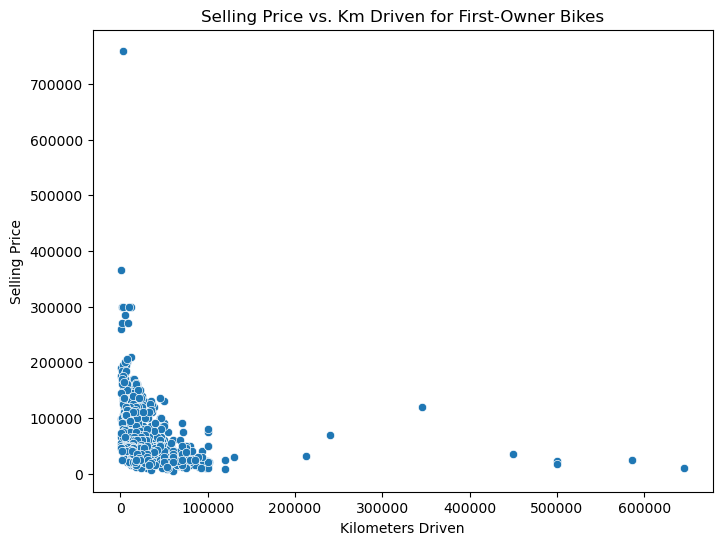

In [29]:
first_owner_bikes = df[df['owner'] == '1st owner']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=first_owner_bikes['km_driven'], y=first_owner_bikes['selling_price'])
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Km Driven for First-Owner Bikes")
plt.show()

In [ ]:
11. Identify and remove outliers in the km_driven column using the IQR method.

In [31]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Number of records after outlier removal: {df_no_outliers.shape[0]}")

Number of records after outlier removal: 1022


In [ ]:
12. Perform a bivariate analysis to visualize the relationship between year and selling_price.


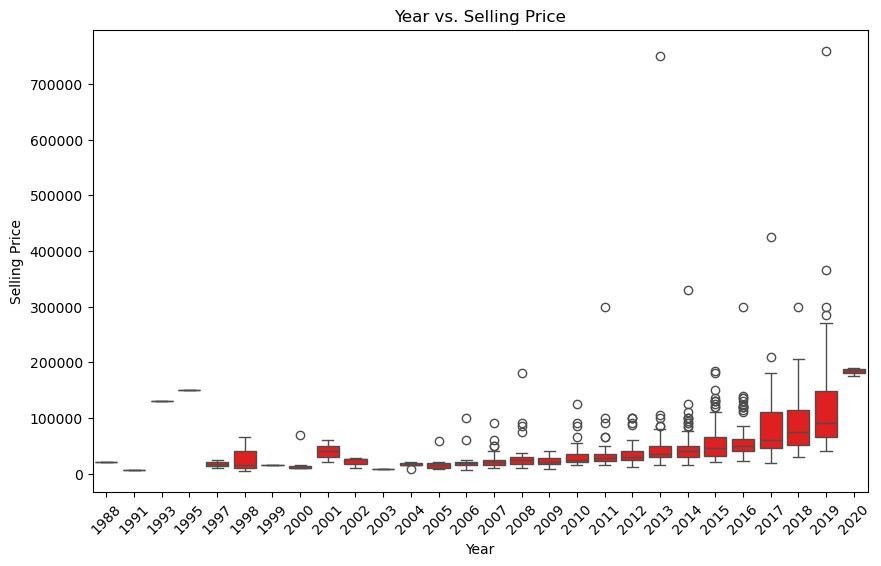

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['year'], y=df['selling_price'], color = 'r')
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs. Selling Price")
plt.show()



In [ ]:
13. What is the average depreciation in selling price based on the bike's age?

In [37]:
df['age'] = 2024 - df['year']
df['depreciation'] = (df['ex_showroom_price'] - df['selling_price']) / df['age']

avg_depreciation = df['depreciation'].mean()
print(f"Average depreciation per year: {avg_depreciation:.2f} INR")



Average depreciation per year: 2962.70 INR


In [ ]:
14. Which bike names are priced significantly above the average price for their manufacturing year?

In [39]:
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['above_avg'] = df.apply(lambda row: row['selling_price'] > avg_price_by_year[row['year']], axis=1)

expensive_bikes = df[df['above_avg']]
print(expensive_bikes[['name', 'year', 'selling_price']])

                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


In [ ]:
15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

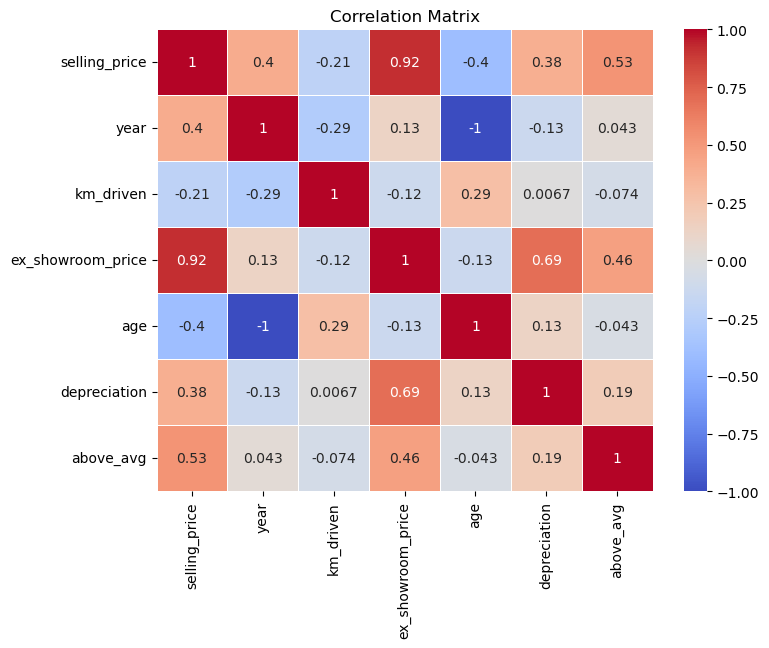

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#####################################################################################################################################################################################

In [ ]:
###########################Exploratory Data Analysis (EDA) on Car Sales Dataset--2 #############################################################################

In [6]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\Car Sale.csv")

In [9]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

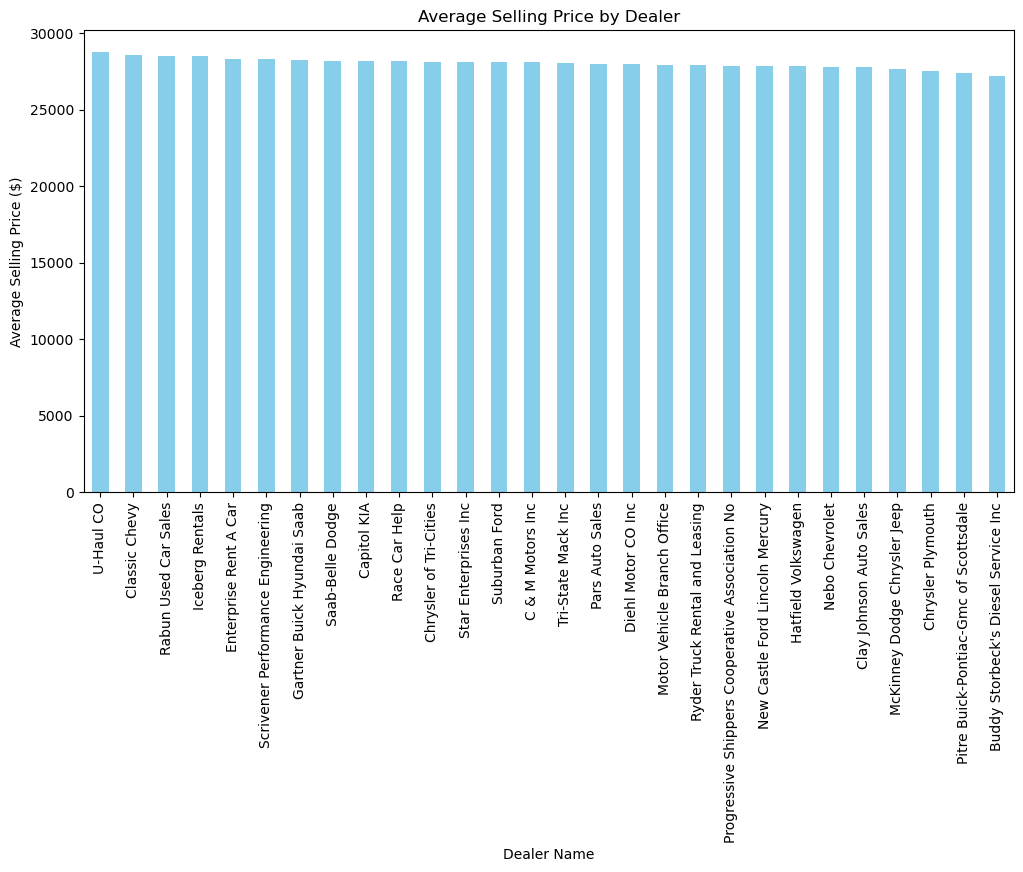

In [11]:
# Calculate average selling price for each dealer
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print(avg_price_by_dealer)

#We can visualize this with a bar plot:

plt.figure(figsize=(12, 6))
avg_price_by_dealer.plot(kind='bar', color='skyblue')
plt.xlabel("Dealer Name")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Selling Price by Dealer")
plt.xticks(rotation=90)
plt.show()

In [ ]:
2. Which car brand (Company) has the highest variation in prices, and what does this tell us about pricing trends?

In [13]:
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(price_variation)

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


In [ ]:
3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

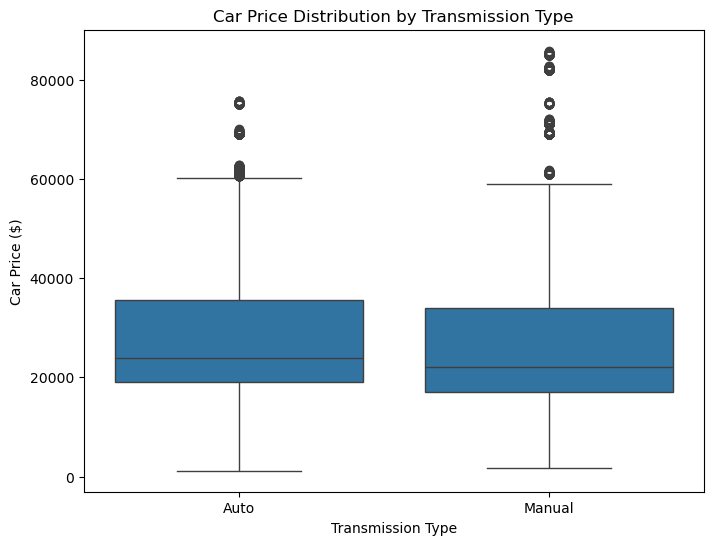

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Transmission'], y=df['Price ($)'])
plt.xlabel("Transmission Type")
plt.ylabel("Car Price ($)")
plt.title("Car Price Distribution by Transmission Type")
plt.show()

In [ ]:
4. What is the distribution of car prices across different regions?

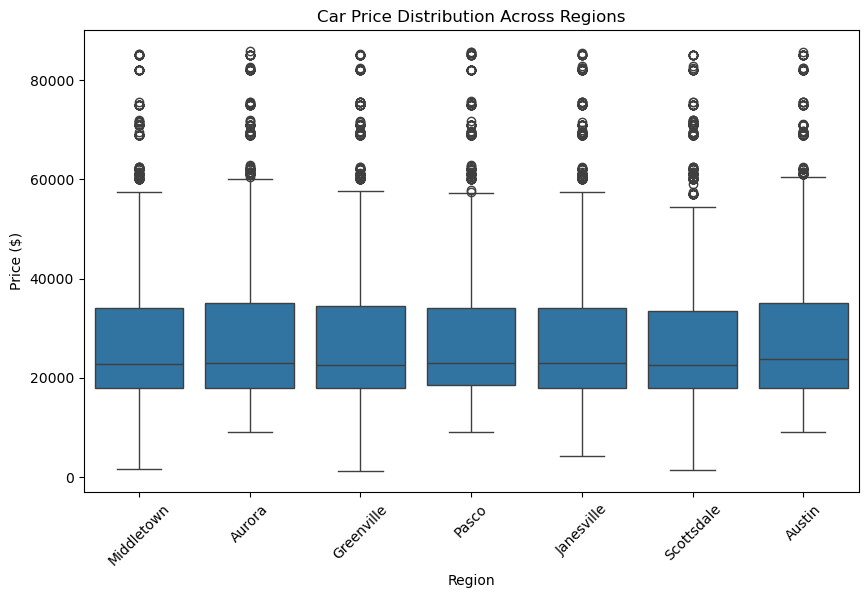

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Dealer_Region'], y=df['Price ($)'])
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.title("Car Price Distribution Across Regions")
plt.show()



In [ ]:
5. What is the distribution of cars based on body styles?

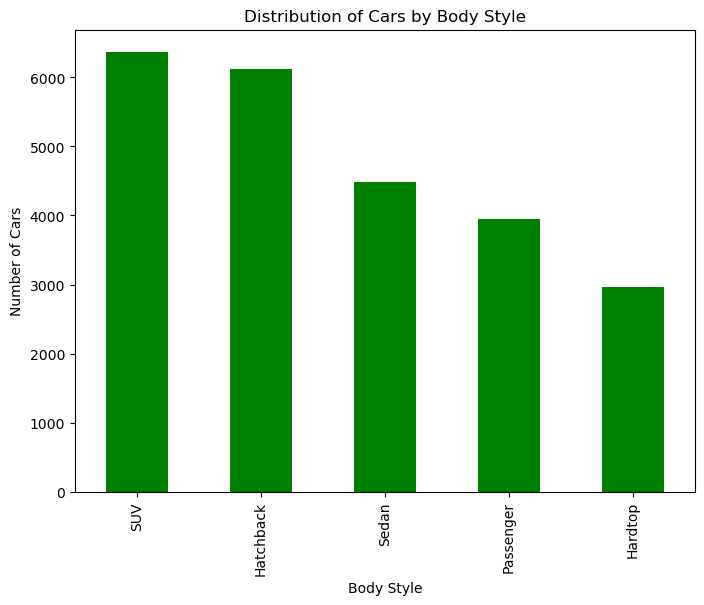

In [21]:
body_style_counts = df['Body Style'].value_counts()

plt.figure(figsize=(8, 6))
body_style_counts.plot(kind='bar', color='g')
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.title("Distribution of Cars by Body Style")
plt.show()

In [ ]:
6. How does the average selling price of cars vary by customer gender and annual income?

Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


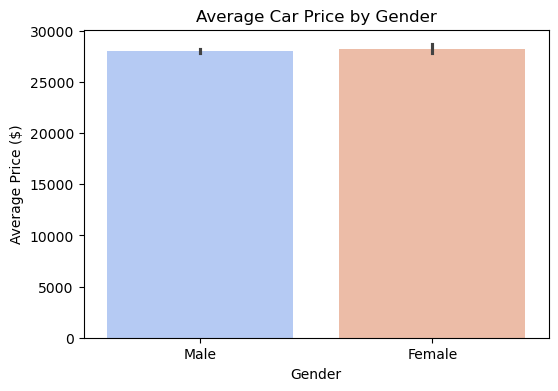

In [29]:
avg_price_by_gender = df.groupby('Gender')['Price ($)'].mean()
print(avg_price_by_gender)

##A visualization:

plt.figure(figsize=(6, 4))
sns.barplot(x=df['Gender'], y=df['Price ($)'], estimator=np.mean, palette='coolwarm')
plt.xlabel("Gender")
plt.ylabel("Average Price ($)")
plt.title("Average Car Price by Gender")
plt.show()


In [ ]:
7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

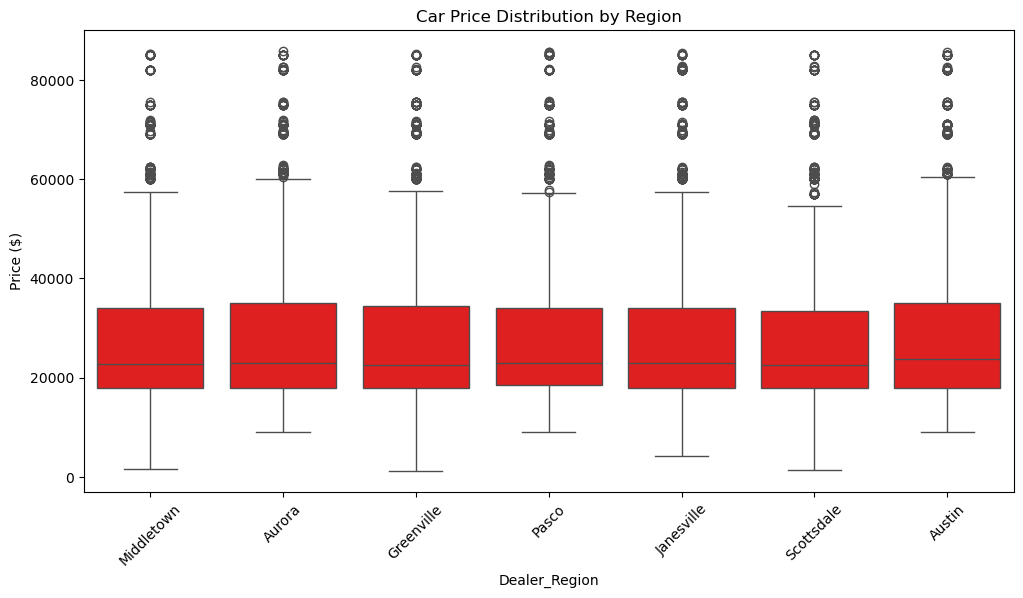

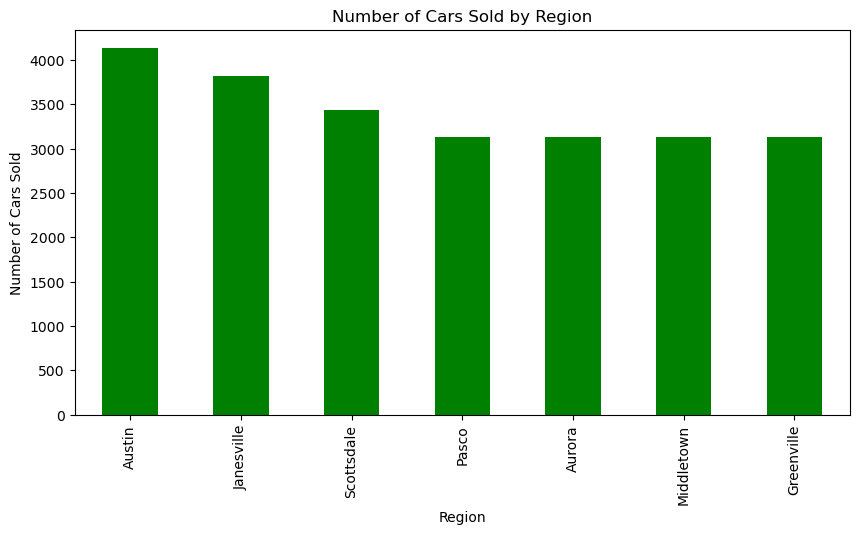

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Dealer_Region'], y=df['Price ($)'],color = 'r')
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Region")
plt.show()

##Number of cars sold per region:

sales_by_region = df['Dealer_Region'].value_counts()

plt.figure(figsize=(10, 5))
sales_by_region.plot(kind='bar', color='green')
plt.xlabel("Region")
plt.ylabel("Number of Cars Sold")
plt.title("Number of Cars Sold by Region")
plt.show()


In [ ]:
8. How does the average car price differ between cars with different engine sizes?

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


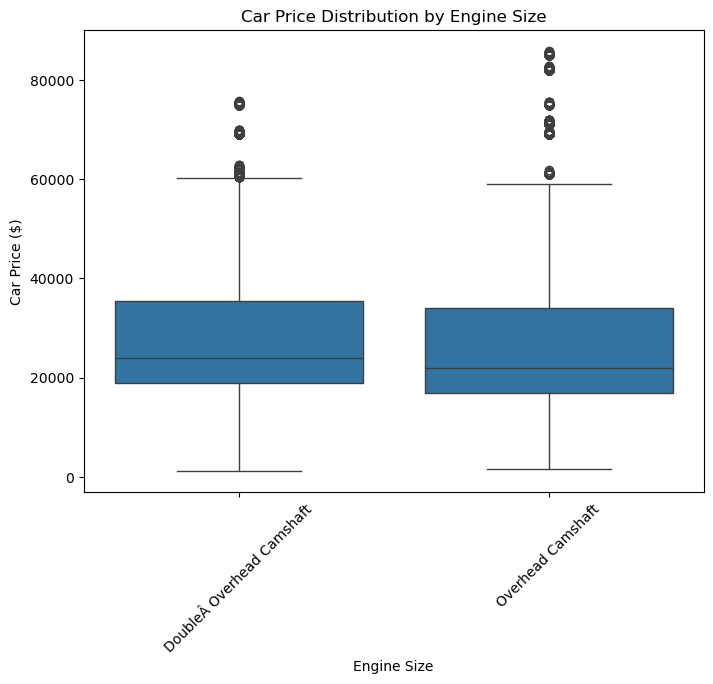

In [35]:
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_by_engine)

##Visualization:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Engine'], y=df['Price ($)'])
plt.xlabel("Engine Size")
plt.ylabel("Car Price ($)")
plt.title("Car Price Distribution by Engine Size")
plt.xticks(rotation=45)
plt.show()


In [ ]:
9. How do car prices vary based on the customer’s annual income bracket?


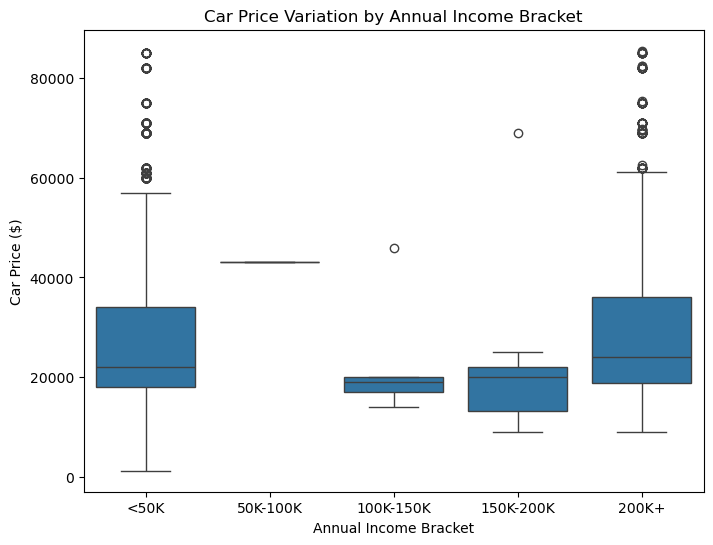

In [37]:
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, 200000, 500000],
                              labels=['<50K', '50K-100K', '100K-150K', '150K-200K', '200K+'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income Bracket'], y=df['Price ($)'])
plt.xlabel("Annual Income Bracket")
plt.ylabel("Car Price ($)")
plt.title("Car Price Variation by Annual Income Bracket")
plt.show()

In [ ]:
10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


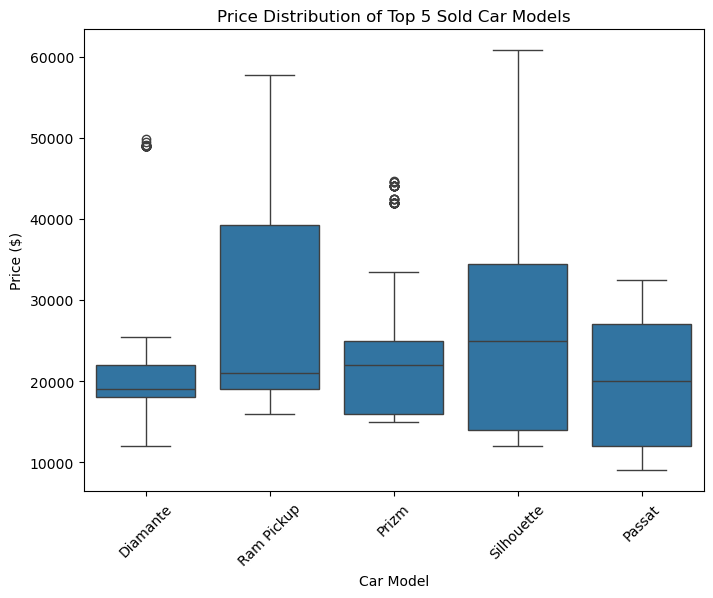

In [39]:
top_models = df['Model'].value_counts().head(5)
print(top_models)

##Visualization:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df[df['Model'].isin(top_models.index)]['Model'], y=df['Price ($)'])
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.title("Price Distribution of Top 5 Sold Car Models")
plt.xticks(rotation=45)
plt.show()


In [ ]:
11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

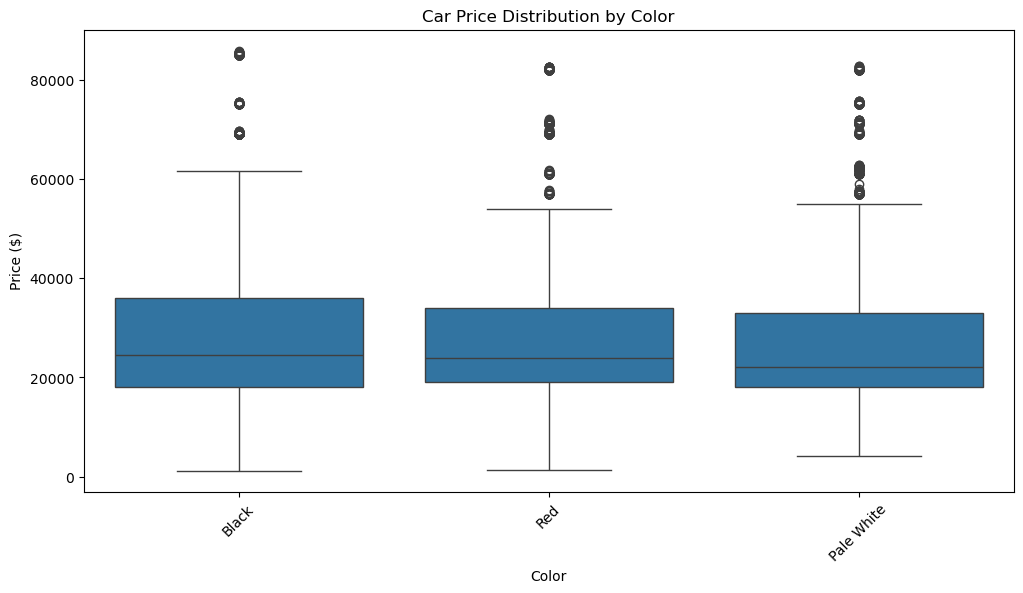

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Color'], y=df['Price ($)'])
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Color")
plt.show()

In [ ]:
12. Is there any seasonal trend in car sales based on the date of sale?

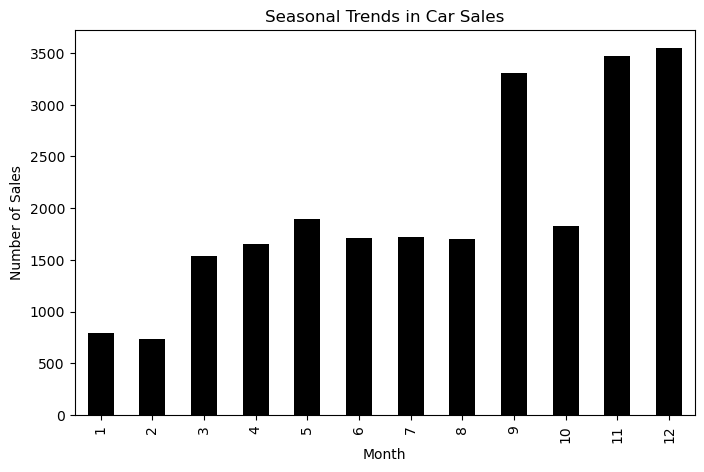

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Price ($)'].count()

plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar', color='black')
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.title("Seasonal Trends in Car Sales")
plt.show()

In [ ]:
13. How does the car price distribution change when considering different combinations of body style and transmission type?

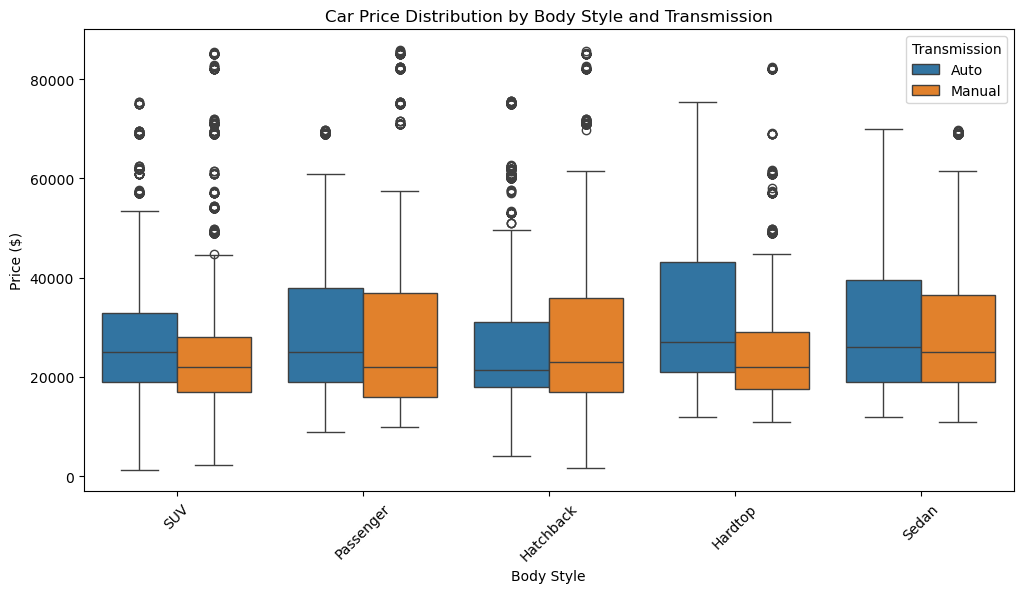

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Body Style'], y=df['Price ($)'], hue=df['Transmission'])
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Body Style and Transmission")
plt.show()



In [ ]:
14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

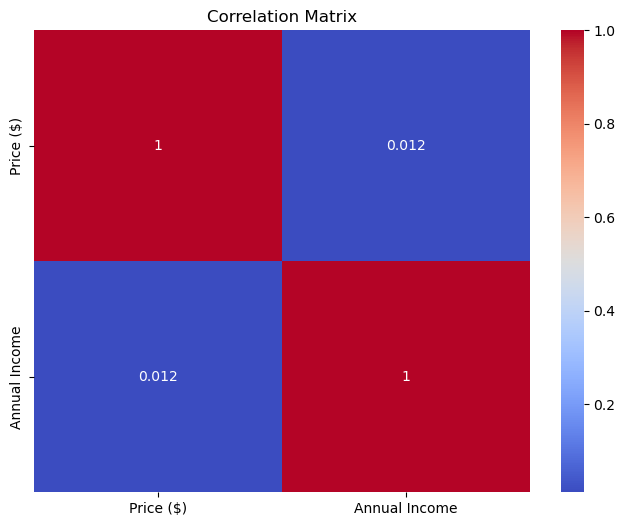

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price ($)', 'Annual Income']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [ ]:
15. How does the average car price vary across different car models and engine types?

In [53]:
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print(avg_price_by_model_engine)

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


In [ ]:
#####################################################################################################################################################################################

In [ ]:
############################# Exploratory Data Analysis (EDA) on Amazon Sales Dataset---3 #################################################################

In [112]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\amazon.csv")

In [114]:
df= df.drop_duplicates()
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
1. What is the average rating for each product category?

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [119]:
#first, we have to convert rating into numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [121]:
# Calculate average rating for each category
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_rating)




category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [ ]:
2. What are the top rating count products by category?

In [123]:
# Rename columns below if your column names are different
# For example: category, product title, and rating count
category_col = 'category'
product_col = 'product_id'
count_col = 'rating_count'

# Convert rating count to numeric (in case it's text)
df[count_col] = pd.to_numeric(df[count_col], errors='coerce')
                              
df = df.dropna(subset=[category_col, product_col, count_col])

# Sort by rating count (highest first)
df_sorted = df.sort_values(by=count_col, ascending=False)

top_products = df_sorted.groupby(category_col).first().reset_index()
top_products = top_products[[category_col, product_col, count_col]]

# Print result
print(top_products)



                                             category  product_id  \
0   Computers&Accessories|Accessories&Peripherals|...  B09F3PDDRF   
1   Computers&Accessories|Accessories&Peripherals|...  B08QSDKFGQ   
2   Computers&Accessories|Accessories&Peripherals|...  B0BBMPH39N   
3   Computers&Accessories|Accessories&Peripherals|...  B0B9LDCX89   
4   Computers&Accessories|Accessories&Peripherals|...  B09GBBJV72   
..                                                ...         ...   
78  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...  B08L12N5H1   
79  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...  B0B7FJNSZR   
80  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...  B09BL2KHQW   
81  OfficeProducts|OfficePaperProducts|Paper|Copy&...  B095X38CJS   
82  OfficeProducts|OfficePaperProducts|Paper|Stati...  B099S26HWG   

    rating_count  
0          817.0  
1          974.0  
2          401.0  
3          491.0  
4          427.0  
..           ...  
78         992.0  
79         535.0  


In [ ]:
3. What is the distribution of discounted prices vs. actual prices?

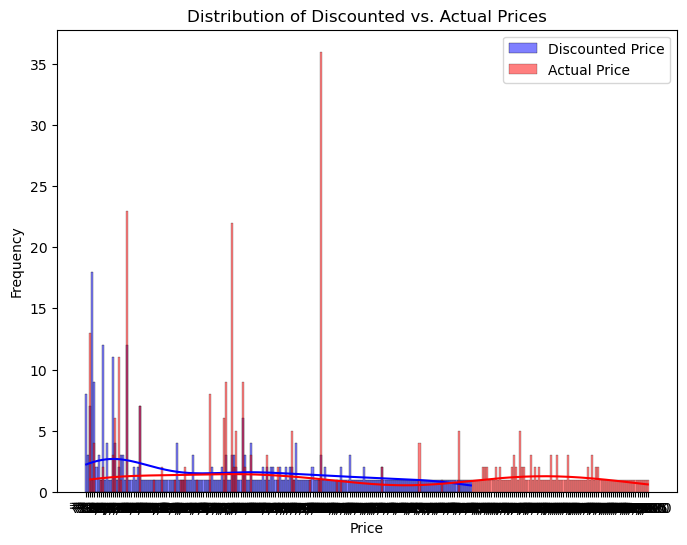

In [125]:
plt.figure(figsize=(8, 6))
sns.histplot(df['discounted_price'], bins=30, color='blue', label='Discounted Price', kde=True)
sns.histplot(df['actual_price'], bins=30, color='red', label='Actual Price', kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Discounted vs. Actual Prices")
plt.legend()
plt.show()

In [ ]:
4. How does the average discount percentage vary across categories?

In [146]:
#convert into numeric:
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

print(avg_discount_by_category)

##Visualization:

plt.figure(figsize=(10, 6))
avg_discount_by_category.plot(kind='bar', color='orange')
plt.xlabel("Category")
plt.ylabel("Average Discount (%)")
plt.title("Average Discount Percentage by Category")
plt.xticks(rotation=90)
plt.show()

In [ ]:
5. What are the most popular product names?

In [130]:
popular_products = df['product_name'].value_counts().head(10)
print(popular_products)

product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                                                            3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                                                       3
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)                                                            3
Portronics Konnect L 20W PD Quick Charge Type-C to 8-Pin USB Mobile Charging Cable, 1.2M, Tangle Resistant, Fast Data Sync(Grey)                                                                                                                   

In [ ]:
6. What are the most popular product keywords?

In [132]:
from collections import Counter
import itertools

# Extract words from product names
words = list(itertools.chain(*df['product_name'].str.lower().str.split()))
word_counts = Counter(words)

# Top 10 most common keywords
print(word_counts.most_common(10))

[('for', 204), ('with', 154), ('&', 95), ('cable', 85), ('and', 85), ('usb', 76), ('|', 71), ('c', 67), ('compatible', 65), ('remote', 65)]


In [ ]:
7. What are the most popular product reviews?

In [134]:
popular_reviews = df['review_title'].value_counts().head(10)
print(popular_reviews)

review_title
Good cable for car,Good substitute for orginal,Better Value for money Product,Way better than the original,Absolutely amazing.,Namm hi kafi hai,Very good,As the names say Durable cell it a durable cable ;-)                        3
Great Cable, Charging Speeds Could Be Better,Good,A good cable.,One of the best type c cable,Works as intended.,A good buy. The extra length helps a lot.,Good,Ok                                                                     3
Get it with bundled discounts.,Heating & Touch screen,Buy for normal usage. NOT FOR CAMERA,The phone is a good device and I am happy with the purchase.,Average quality.,Exlent mobile,Valueable buy,A GOOD AND AFFORDABLE PRODUCT    3
Very good product.,Using as a spare cable in car,Sturdy, Durable, Fast Charging!,Good brand,It’s like original apple cable,One of the best wire ..,Super well build. Quality product worth the money,Good product                     3
Good product,Its good, but micro usb doesn't fit my phone.,

In [ ]:
8. What is the correlation between discounted_price and rating?

                  discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     1.0


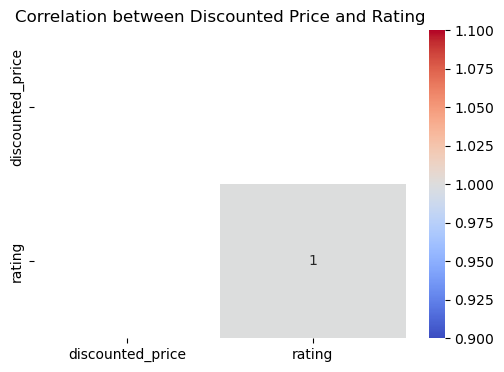

In [148]:
#convert into numeric:
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

correlation = df[['discounted_price', 'rating']].corr()
print(correlation)

#Visualization:

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between Discounted Price and Rating")
plt.show()


In [ ]:
9. What are the Top 5 categories based on the highest ratings?

In [150]:
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)

category
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice           5.00
Electronics|Mobiles&Accessories|MobileAccessories|Photo&VideoAccessories|SelfieSticks    4.60
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                             4.50
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers    4.45
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                      4.40
Name: rating, dtype: float64


In [ ]:
10. Identify any potential areas for improvement or optimization based on the data analysis.
Answer-
    1.Categories with low ratings may need product quality improvements.
    
    2.High discount percentage does not always lead to higher ratings.
    
    3.Certain keywords appear frequently, suggesting trends in product demand.


In [ ]:
##################################################################################################################################################################################

In [152]:
######################################################  Exploratory Data Analysis (EDA) on Spotify Dataset---4 #########################################

In [5]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\spotify.csv")

In [7]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [ ]:
1. Read the dataframe, check null values, and remove duplicates if present.

In [9]:
# Check for null values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Remove duplicate rows
df = df.drop_duplicates()
print(f"Dataset size after removing duplicates: {df.shape}")

Missing values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Dataset size after removing duplicates: (413, 5)


In [ ]:
2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

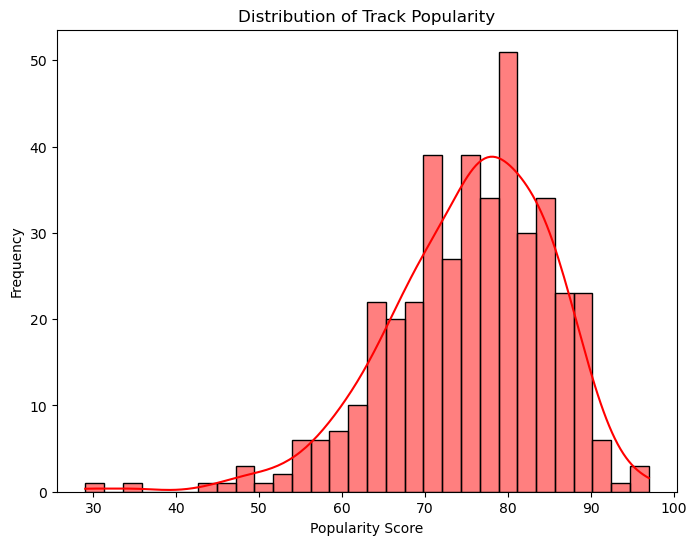

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='r')
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Track Popularity")
plt.show()

In [ ]:
3. Is there any relationship between popularity and track duration? (Scatter plot)


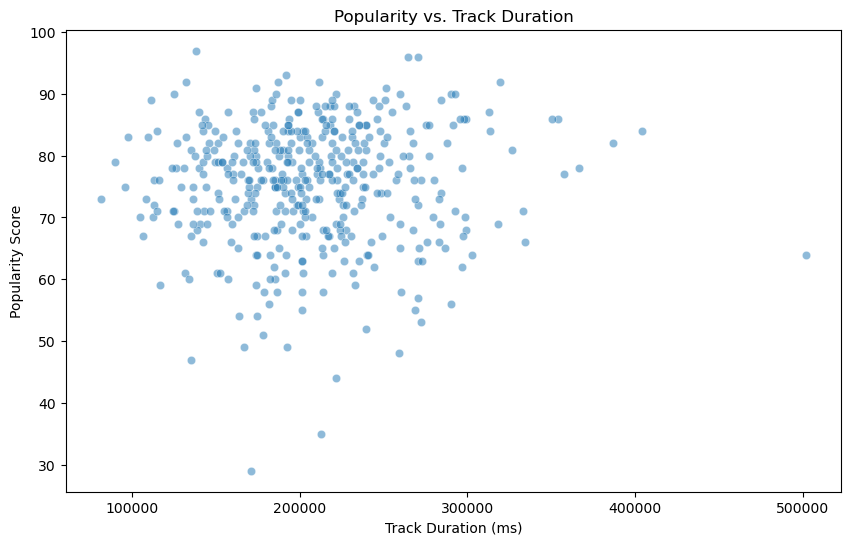

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'], alpha=0.5)
plt.xlabel("Track Duration (ms)")
plt.ylabel("Popularity Score")
plt.title("Popularity vs. Track Duration")
plt.show()



In [ ]:
4. Which artist has the highest number of tracks in the dataset? Display the count using a bar plot.

Artist
Drake           17
Eminem          11
Flo Rida        10
Ludacris        10
Timbaland       10
¥$              10
21 Savage       10
JAY-Z           10
Lil Nas X       10
Travis Scott     9
Name: count, dtype: int64


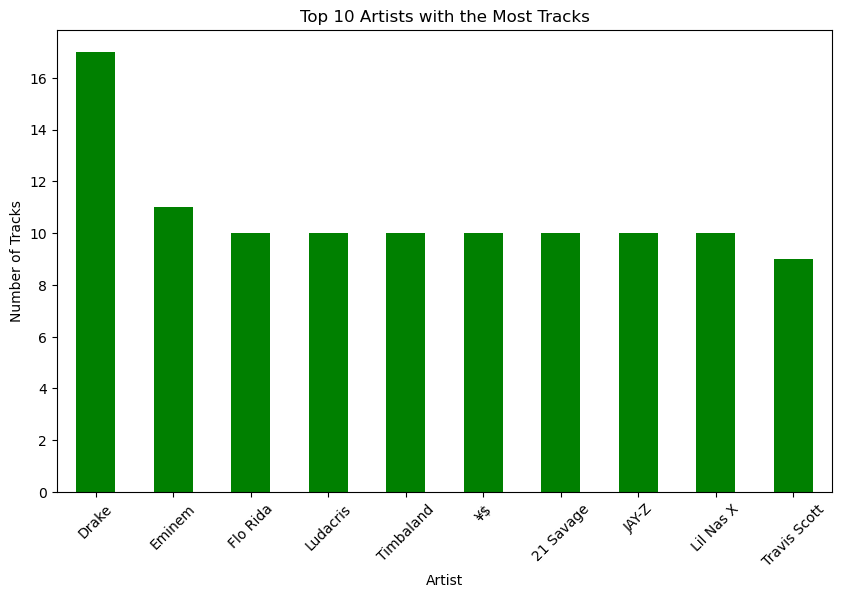

In [25]:
artist_counts = df['Artist'].value_counts().head(10)
print(artist_counts)

plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar', color='green')
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.title("Top 10 Artists with the Most Tracks")
plt.xticks(rotation=45)
plt.show()

In [ ]:
5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name.

In [27]:
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [ ]:
6. Among the top 5 most popular artists, which one has the highest average popularity?


In [29]:
top_artists = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(avg_popularity)



Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


In [ ]:
7. For the top 5 most popular artists, what are their most popular tracks?


In [31]:
popular_tracks_by_artist = df[df['Artist'].isin(top_artists)].groupby('Artist').apply(lambda x: x.nlargest(1, 'Popularity'))[['Track Name', 'Popularity']]
print(popular_tracks_by_artist)

                                            Track Name  Popularity
Artist                                                            
Drake     0    Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem    80                                Without Me          90
Flo Rida  300                       Low (feat. T-Pain)          84
Ludacris  371                             My Chick Bad          67
Timbaland 380                            The Way I Are          85


In [ ]:
8. Visualize relationships between multiple numerical variables using a pair plot.


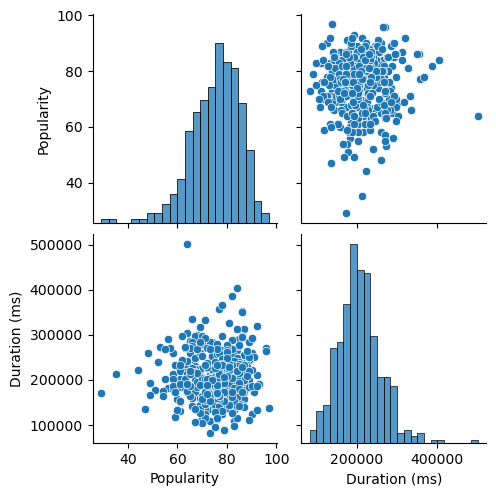

In [33]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()

In [ ]:
9. Does the duration of tracks vary significantly across different artists? (Box plot or violin plot)

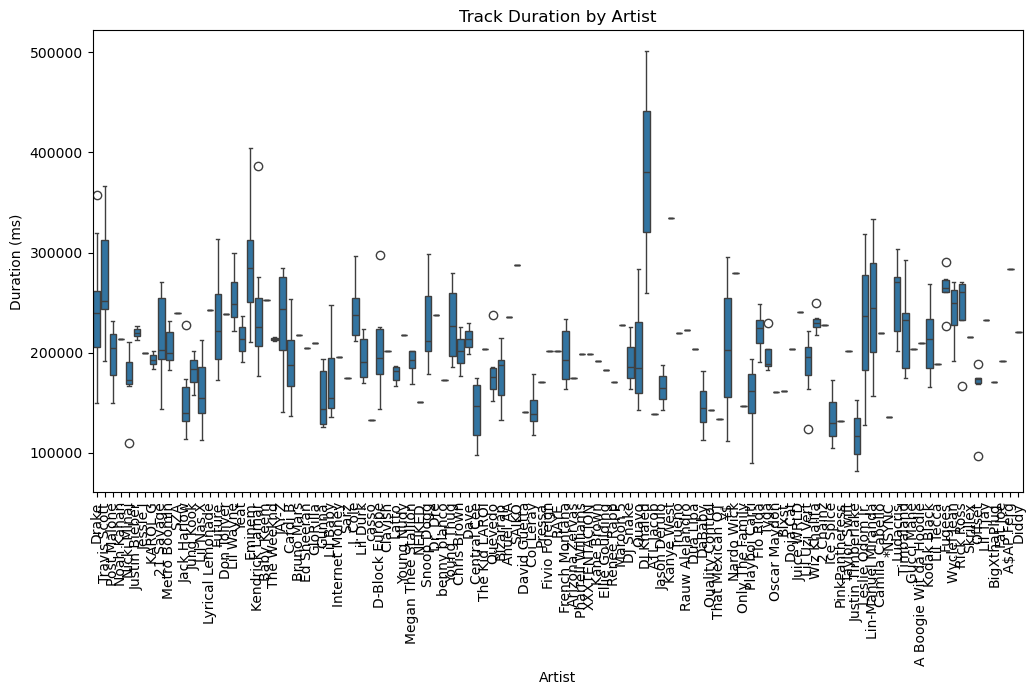

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Artist'], y=df['Duration (ms)'])
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.title("Track Duration by Artist")
plt.show()



In [ ]:
10. How does the distribution of track popularity vary for different artists? (Swarm plot or violin plot)